# Clustering analysis

#### Basic import - required for all starting jupyters

In [2]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import pysplit as py
import pickle as pickle
from pprint import pprint
import os

Create a trajectory group - the below is for 2000-2017

- need to decide what groups I was to look at for the year, good idea to get an idea for each of the seasons and then expand past this

In [4]:
trajgroup = py.make_trajectorygroup(r'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/*20*')
print('Total trajectories in group: ',trajgroup.trajcount)

Total trajectories in group:  6575


In [12]:
#making a file which the clusters will be saved
trajgroup.make_infile(r'/Volumes/Seagate_Backup/hysplit4/cluster/working')

### Clustering through HySplit
Clustering is done through the program on the computer. Hysplit does the analysis from this, and then the clusters which are developed there can be placed in here.

In [5]:
traj_assignment = r'/Volumes/Seagate_Backup/hysplit4/cluster/working/CLUSLIST_4'
clusterpath_dir = r'/Volumes/Seagate_Backup/hysplit4/cluster/working/'

clusgroup = py.spawn_clusters(trajgroup, traj_assignment, clusterpath_dir)

Clusters plotted on the program.

/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


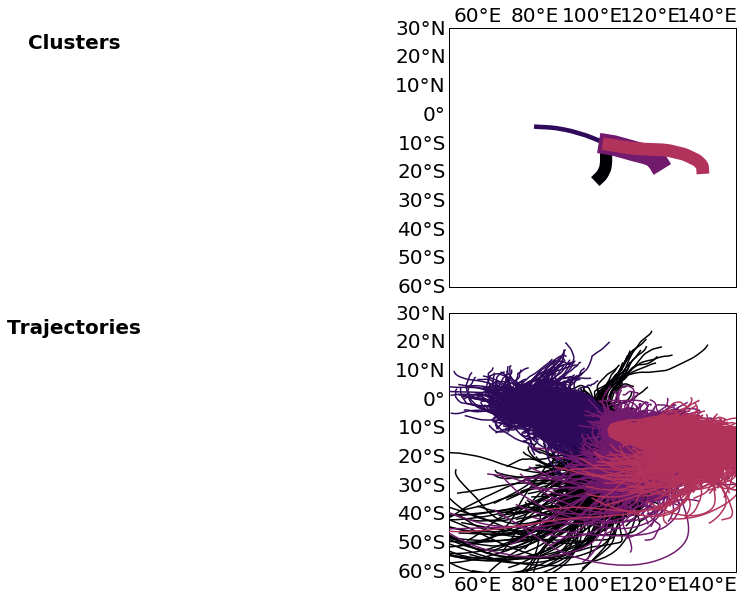

In [6]:
colors = np.linspace(0, 0.95, 7)

mapcorners =  [50, -60, 150, 30]
standard_pm = None
mapdesign0 = py.MapDesign(mapcorners, standard_pm)
mapdesign1 = py.MapDesign(mapcorners, standard_pm, lon_labels=['bottom'])

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10,10))
map0 = mapdesign0.make_basemap(ax=ax0)
map1 = mapdesign1.make_basemap(ax=ax1)

# Text on maps
x, y = map0(-80, 25)
font_params = {'horizontalalignment' : 'center',
               'verticalalignment' : 'center',
               'fontsize' : 20,
               'weight' : 'bold'}

ax0.text(x, y, 'Clusters', **font_params)
ax1.text(x, y, 'Trajectories', **font_params)

for clus, color in zip(clusgroup, colors):
    params = {'zorder' : 24,
    		  'latlon' : True,
    		  'c' : plt.cm.inferno(color)}

    map0.plot(*clus.path.xy, lw=(clus.trajcount/clusgroup.trajcount)*50,
    		  **params)

    for traj in clus:
        map1.plot(*traj.path.xy, lw=1.5, **params)
        
fig.subplots_adjust(hspace=0.1)
plt.show()